In [1]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\IBRAHIM\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Tue Feb  3 12:34:55 2026).


In [2]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])
df_da_us_exploded = df_da_us.explode('job_skills')
df_da_us_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [7]:
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(
    count='count',
    median='median'
).sort_values('count', ascending=False)
df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_da_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [10]:
da_job_count = len(df_da_us)
df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_count * 100
skill_percent = 5
df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]
df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


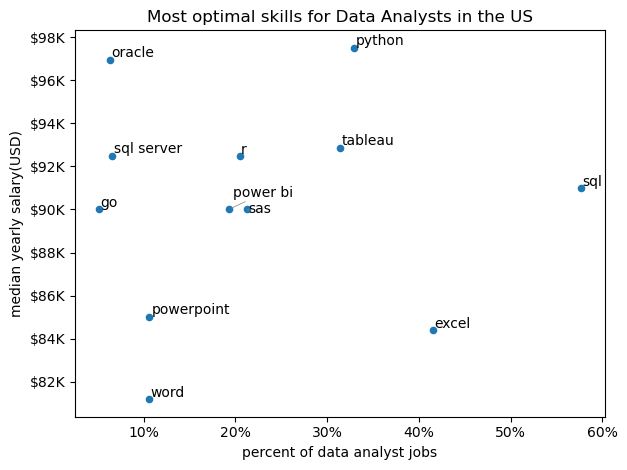

In [15]:
from adjustText import adjust_text

df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.title('Most optimal skills for Data Analysts in the US')
plt.xlabel('percent of data analyst jobs')
plt.ylabel('median yearly salary(USD)')
plt.tight_layout()

texts =[]
for w, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[w], df_da_skills_high_demand['median_salary'].iloc[w], txt, fontsize=10))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K'))
    # plt.text(df_da_skills_high_demand.iloc[w]['skill_percent'], df_da_skills_high_demand.iloc[w]['median_salary'], txt, fontsize=10)
    # plt.annotate(txt, (df_da_skills_high_demand.iloc[w]['skill_percent'], df_da_skills_high_demand.iloc[w]['median_salary']), fontsize=10)

plt.show()

In [17]:
df_technology = df['job_type_skills'].copy()

#remove duplicates
df_technology = df_technology.drop_duplicates()

#remove NaN values
df_technology= df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: #if key already exists in technology_dict, add value to existing key
            technology_dict[key] += value
        else:
            technology_dict[key] = value

#remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['tableau',
  'powerbi',
  'spss',
  'cognos',
  'splunk',
  'alteryx',
  'sheets',
  'sap',
  'outlook',
  'dax',
  'ssis',
  'sharepoint',
  'looker',
  'spreadsheet',
  'qlik',
  'power bi',
  'word',
  'ssrs',
  'esquisse',
  'msaccess',
  'sas',
  'microstrategy',
  'nuix',
  'excel',
  'visio',
  'ms access',
  'powerpoint',
  'datarobot'],
 'programming': ['sql',
  'css',
  'groovy',
  'f#',
  'elixir',
  'apl',
  'java',
  'mongodb',
  'delphi',
  'r',
  'kotlin',
  'python',
  'swift',
  'solidity',
  'cobol',
  'haskell',
  'visualbasic',
  'assembly',
  'no-sql',
  'pascal',
  'ocaml',
  'mongo',
  'shell',
  'javascript',
  'perl',
  'vb.net',
  'vba',
  'objective-c',
  'bash',
  'golang',
  'erlang',
  'matlab',
  'ruby',
  'nosql',
  'visual basic',
  'dart',
  't-sql',
  'sas',
  'go',
  'c++',
  'php',
  'clojure',
  'lisp',
  'lua',
  'html',
  'julia',
  'typescript',
  'c',
  'rust',
  'scala',
  'sass',
  'fortran',
  'powershell',
  'crystal',
  

In [20]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,tableau
0,analyst_tools,powerbi
0,analyst_tools,spss
0,analyst_tools,cognos
0,analyst_tools,splunk
...,...,...
9,sync,twilio
9,sync,microsoft teams
9,sync,slack
9,sync,ringcentral


In [50]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot = df_plot.set_index('skills')
df_plot

,skill_count,median_salary,skill_percent,technology
skills,,,,
sql,2508,91000.00,57.655172,programming
excel,1808,84392.00,41.563218,analyst_tools
python,1431,97500.00,32.896552,programming
tableau,1364,92875.00,31.356322,analyst_tools
sas,926,90000.00,21.287356,analyst_tools
sas,926,90000.00,21.287356,programming
r,893,92500.00,20.528736,programming
power bi,838,90000.00,19.264368,analyst_tools
powerpoint,462,85000.00,10.620690,analyst_tools


4 [-0.29949701 -0.04632335]
5 [-0.06272242  0.95261237]


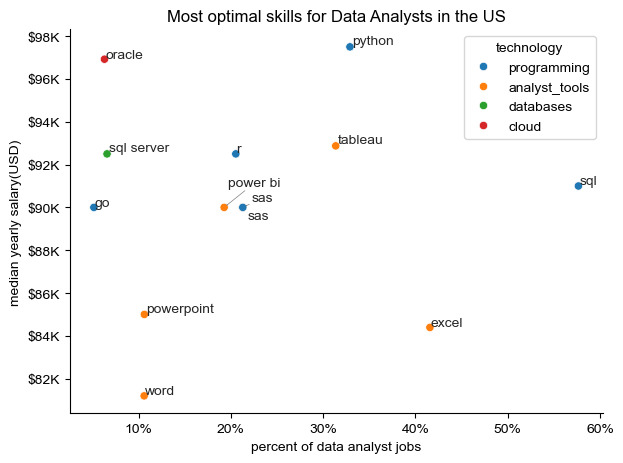

In [52]:
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology' 
)

sns.despine()
sns.set_theme(style='ticks')
#set axis labels, title, and legend
plt.title('Most optimal skills for Data Analysts in the US')
plt.xlabel('percent of data analyst jobs')
plt.ylabel('median yearly salary(USD)')
plt.tight_layout()

#prepare texts for adjustText
texts =[]
for w, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot['skill_percent'].iloc[w], df_plot['median_salary'].iloc[w], txt, fontsize=10))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K'))
    # plt.text(df_plot.iloc[w]['skill_percent'], df_plot.iloc[w]['median_salary'], txt, fontsize=10)
    # plt.annotate(txt, (df_plot.iloc[w]['skill_percent'], df_plot.iloc[w]['median_salary']), fontsize=10)

#adjust layout and display plot
plt.tight_layout()
plt.show()